# DATA SET: Hospital Readmission

**Description:**
This dataset contains information on hospital readmissions for patients with heart failure,
 pneumonia, and acute myocardial infarction. It includes demographic information, lab test results, medications, 
and other clinical factors.

**Columns Description:**

"age" - age bracket of the patient

"time_in_hospital" - days (from 1 to 14)

"n_procedures" - number of procedures performed during the hospital stay

"n_lab_procedures" - number of laboratory procedures performed during the hospital stay

"n_medications" - number of medications administered during the hospital stay

"n_outpatient" - number of outpatient visits in the year before a hospital stay

"n_inpatient" - number of inpatient visits in the year before the hospital stay

"n_emergency" - number of visits to the emergency room in the year before the hospital stay

"medical_specialty" - the specialty of the admitting physician

"diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)

"diag_2" - secondary diagnosis

"diag_3" - additional secondary diagnosis

"glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed

"A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed

"change" - whether there was a change in the diabetes medication ('yes' or 'no')

"diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')

"readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')

**Importing necessory libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#### Loading the Dataset

In [2]:
df=pd.read_csv('hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

From the above result we can see the columns of our dataset

In [4]:
df.shape

(25000, 17)

As per the above output we can see that our dataset is having 25000 rows and 17 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

From the above result we can see the data types, missing_values from the dataset

In [6]:
df.describe(include=np.number)

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


Here we are checking the detailed description of the numerical varables.

In [7]:
df.describe(exclude=np.number)

,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,6,7,8,8,8,3,3,2,2,2
top,[70-80),Missing,Circulatory,Other,Other,no,no,no,yes,no
freq,6837,12382,7824,9056,9107,23625,20938,13497,19228,13246


Here we are checking the detailed description of the catagorical varables.

In [8]:
df.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

From the above result we can infer that there is no null values in the dataset so no need for null value treatment

In [9]:
df['age'].value_counts(ascending=False)

[70-80)     6837
[60-70)     5913
[80-90)     4516
[50-60)     4452
[40-50)     2532
[90-100)     750
Name: age, dtype: int64

In [10]:
for i in df.select_dtypes(include=np.number):
    aa=df[i].unique()
    print(i)
    print(aa)
    print()

time_in_hospital
[ 8  3  5  2  1  4  7 10  6 12 11  9 14 13]

n_lab_procedures
[ 72  34  45  36  42  51  44  19  67  37  35  69  60  73  52   9  16  62
  54  58  40  23  32  65   1  47  39  59  68  66  43  30  46  48   5  24
  70  25  29  49  53  94  18  61  11  33  28  83  50  71  86  38   3  41
  31  55  56  27  64  82  26  90  21   2  20  17  78 102  75  15   8   7
  76  63  57  10   4  22  91  74  14  13  89  79  81  84  80   6  77  12
 108  88  92  93 101  97 100  85  95  87  98  96  99 103 111 106 113 109
 105]

n_procedures
[1 2 0 6 3 5 4]

n_medications
[18 13 12  7 10 21 16  6 26 20 11 27 15  8 22 17 14 28  5 24  9 19  1 25
 32  3 31 23 39 34 40  4 38  2 33 56 44 29 46 30 47 41 35 36 50 49 54 57
 60 37 61 52 51 42 53 43 45 59 62 79 63 55 65 48 58 69 68 72 75 64]

n_outpatient
[ 2  0  1  3  7  5  4  6  9  8 11 10 15 21 13 12 27 16 14 33 20 18 23]

n_inpatient
[ 0  2  3  1  6  9  7  4  5  8 10 11 14 12 15 13]

n_emergency
[ 0  1 10  2  3  4  5  7  6 12  8 16 28 18 11  9 37 21 13

In [11]:
for i in df.select_dtypes(exclude=np.number):
    aa=df[i].unique()
    print(i)
    print(aa)
    print()

age
['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']

medical_specialty
['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']

diag_1
['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']

diag_2
['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']

diag_3
['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']

glucose_test
['no' 'normal' 'high']

A1Ctest
['no' 'normal' 'high']

change
['no' 'yes']

diabetes_med
['yes' 'no']

readmitted
['no' 'yes']



In [12]:
for i in df.select_dtypes(include=np.number):
    print(i)
    print()
    aa=df[i].value_counts()
    print(aa)

time_in_hospital

3     4311
2     3986
1     3480
4     3467
5     2542
6     1895
7     1467
8     1104
9      768
10     588
11     458
12     354
13     299
14     281
Name: time_in_hospital, dtype: int64
n_lab_procedures

1      751
43     638
44     589
45     572
38     547
      ... 
102      1
103      1
111      1
113      1
109      1
Name: n_lab_procedures, Length: 109, dtype: int64
n_procedures

0    11409
1     5098
2     3064
3     2395
6     1227
4      999
5      808
Name: n_procedures, dtype: int64
n_medications

12    1509
15    1469
13    1459
11    1396
14    1396
      ... 
68       2
79       1
72       1
75       1
64       1
Name: n_medications, Length: 70, dtype: int64
n_outpatient

0     20859
1      2076
2       913
3       537
4       269
5       136
6        74
7        39
8        18
11       16
9        13
10       12
13        7
14        7
12        6
15        5
21        3
27        2
16        2
20        2
18        2
33        1
23        1
Name: 

In [13]:
df.select_dtypes(include=np.number)

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
0,8,72,1,18,2,0,0
1,3,34,2,13,0,0,0
2,5,45,0,18,0,0,0
3,2,36,0,12,1,0,0
4,1,42,0,7,0,0,0
...,...,...,...,...,...,...,...
24995,14,77,1,30,0,0,0
24996,2,66,0,24,0,0,0
24997,5,12,0,6,0,1,0
24998,2,61,3,15,0,0,0


# Uni-Varient Analysis - Numerical

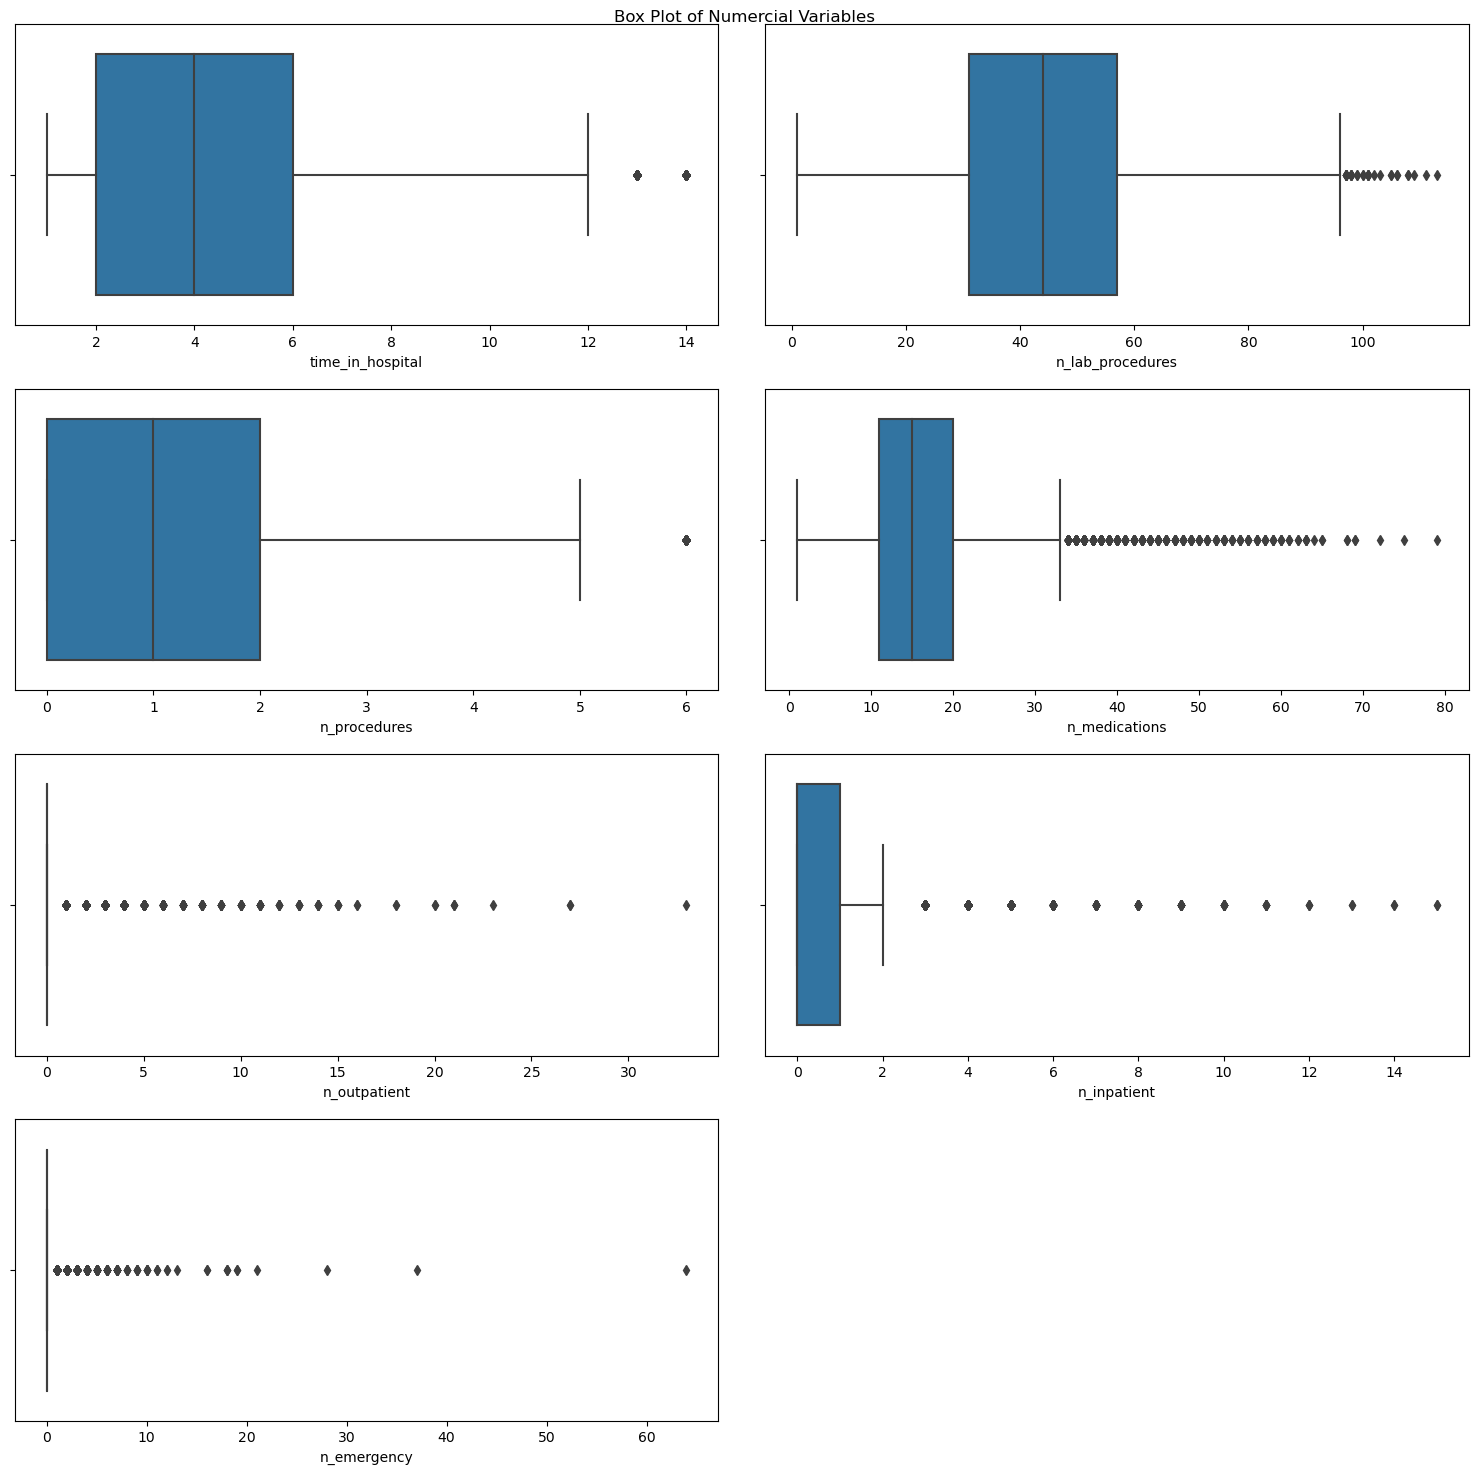

In [14]:
# Numerical plot
num_vars = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency']

# Subplots
fig, axs = plt.subplots(4,2, figsize=(15,15))
axs = axs.flatten()

fig.suptitle("Box Plot of Numercial Variables")

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()    

#removing empty graph
fig.delaxes(axs[7])


plt.show()

# Uni-Variate Analysis- Categorical

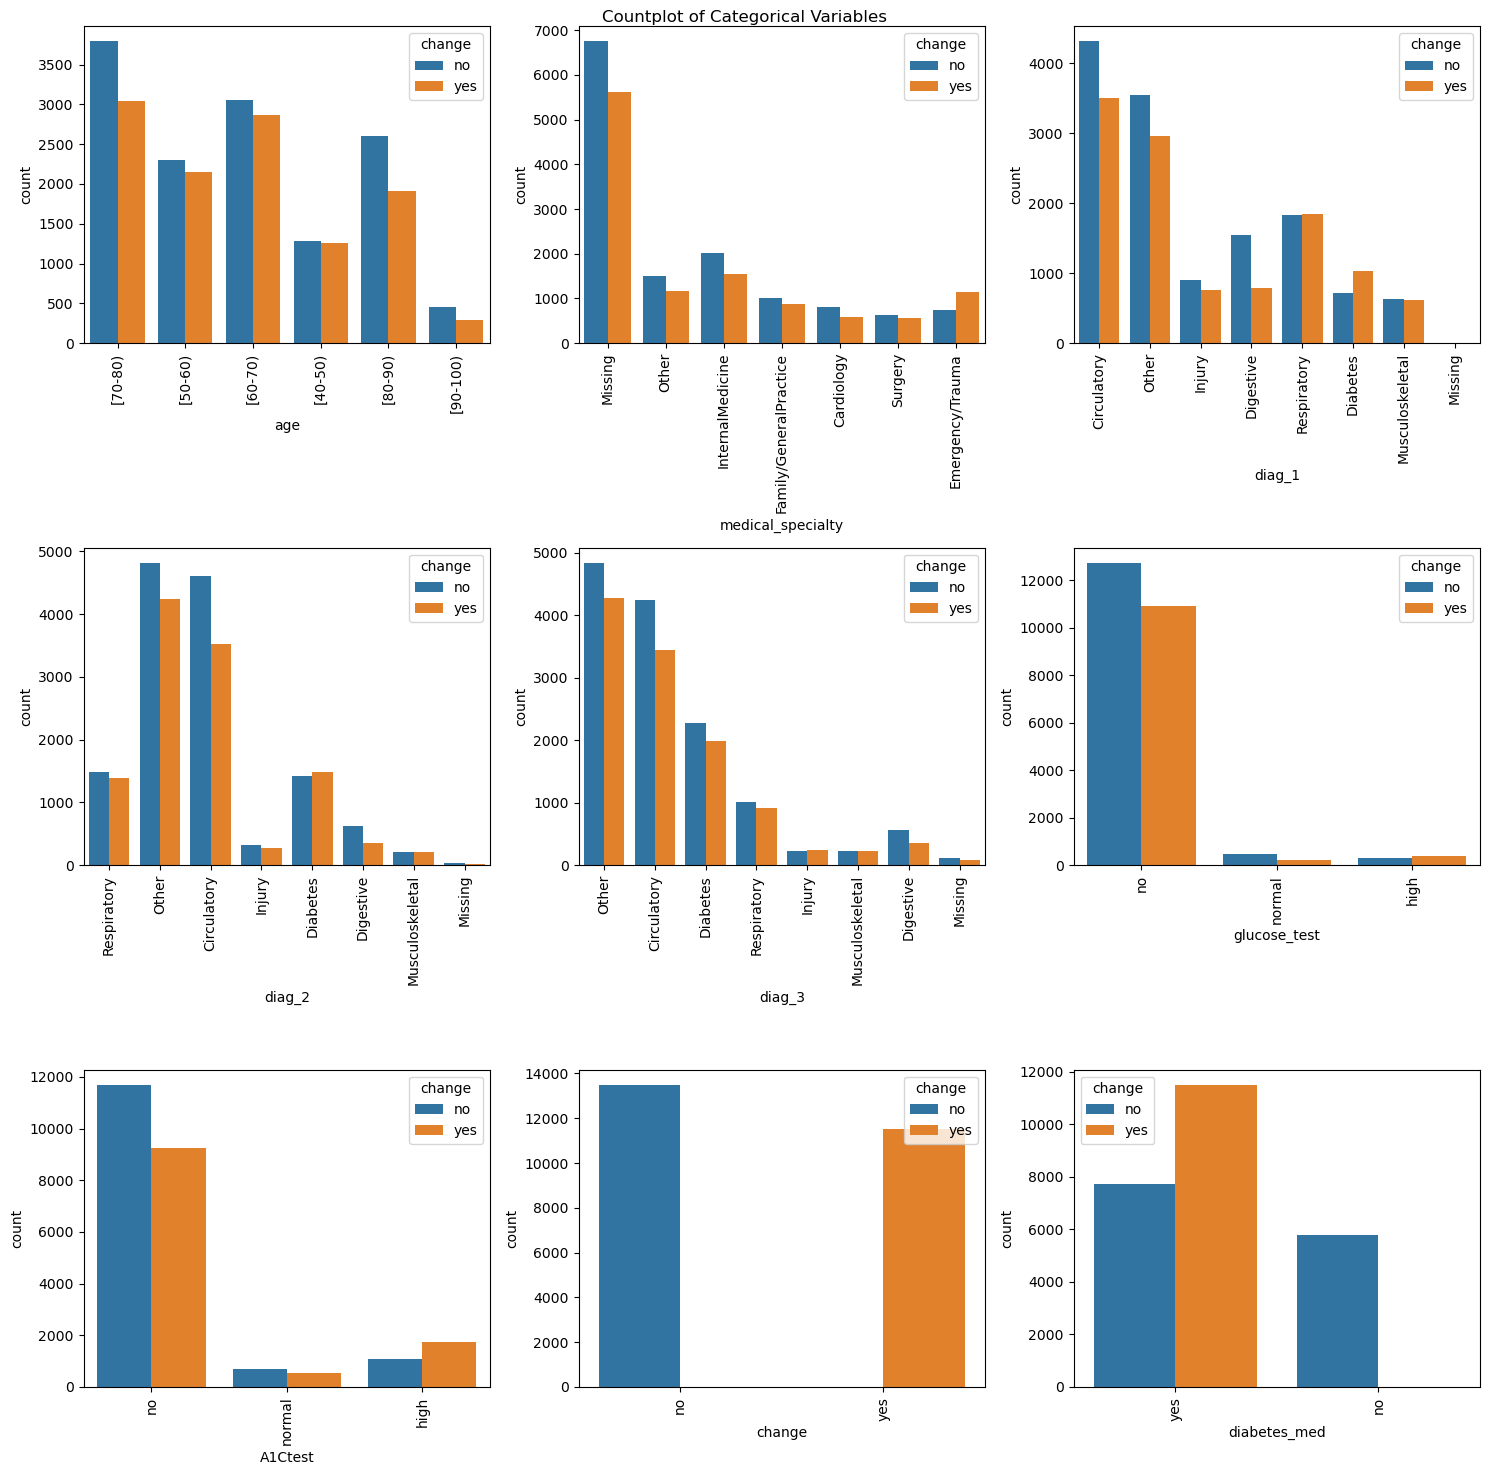

In [15]:
# Categorical plot
cat_vars = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med']

# subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axs = axs.flatten()

fig.suptitle("Countplot of Categorical Variables")

for i,var in enumerate(cat_vars):
    sns.countplot(x=var, hue='change', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()    
plt.show()

# Bi-Varient Analysis

# **Numerical vs Numerical Analysis**

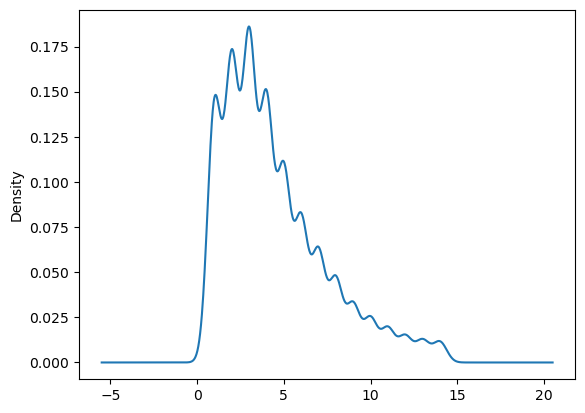

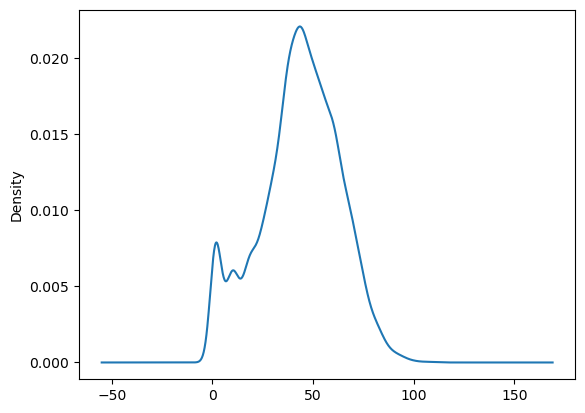

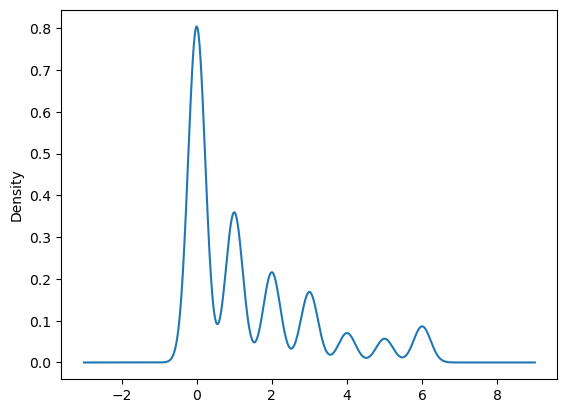

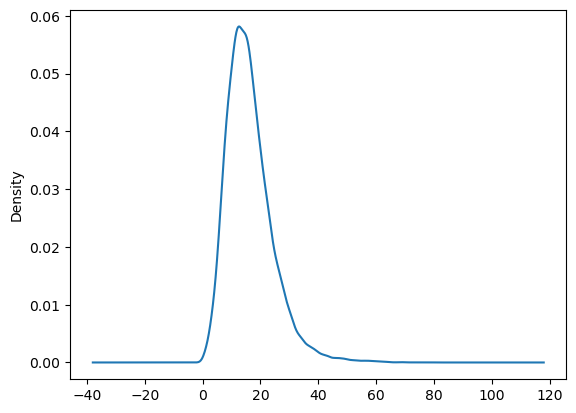

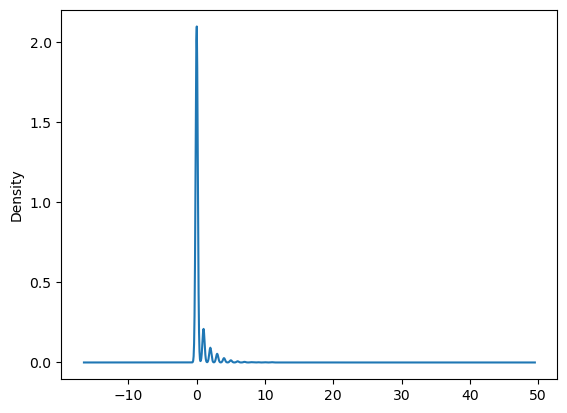

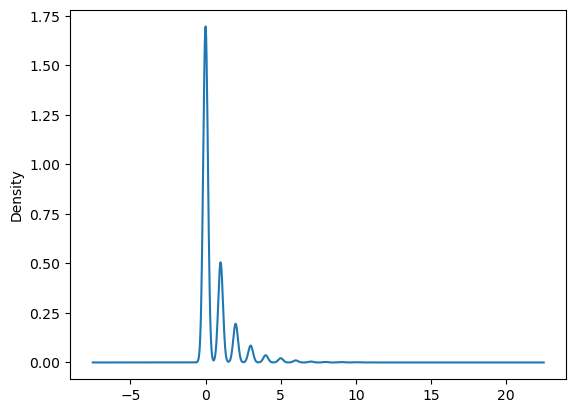

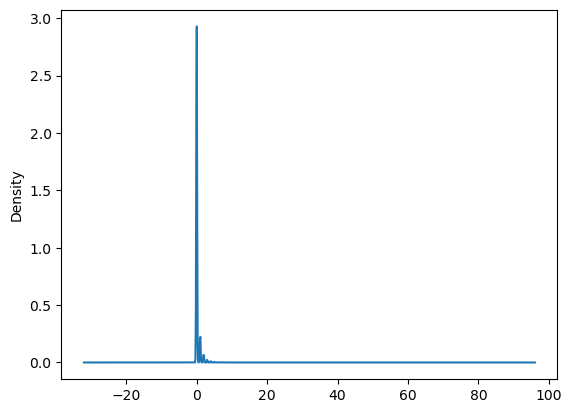

In [16]:
for i in df.select_dtypes(include=np.number).columns:
    df[i].plot(kind='kde')
    plt.show()

# Categorical vs Categorical

age


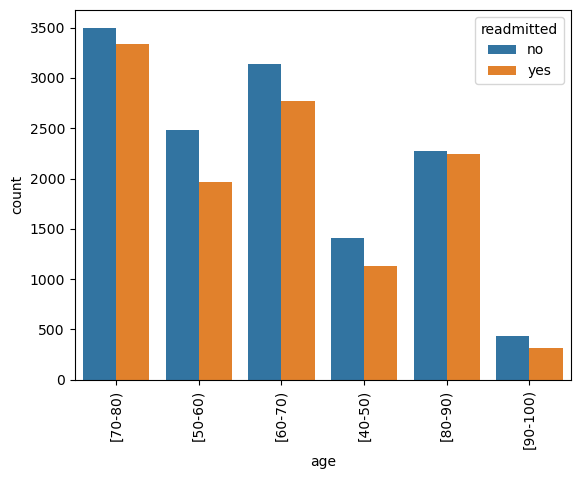

medical_specialty


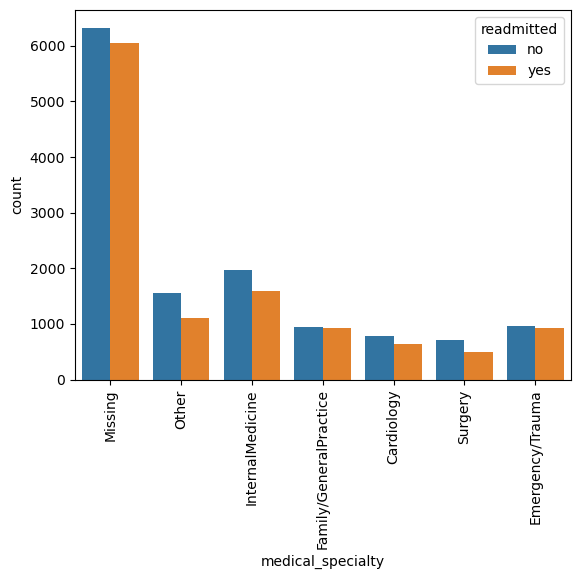

diag_1


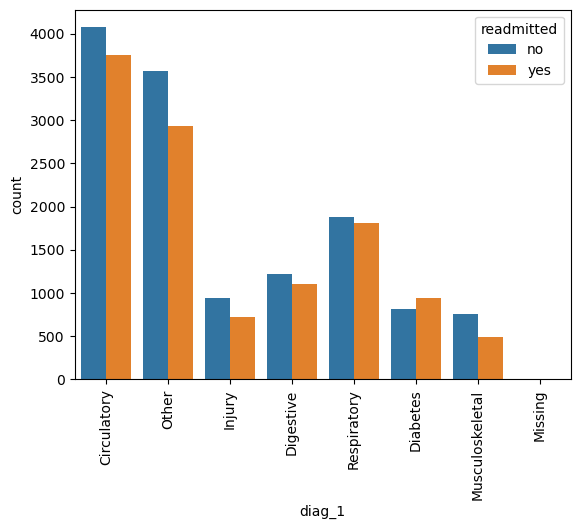

diag_2


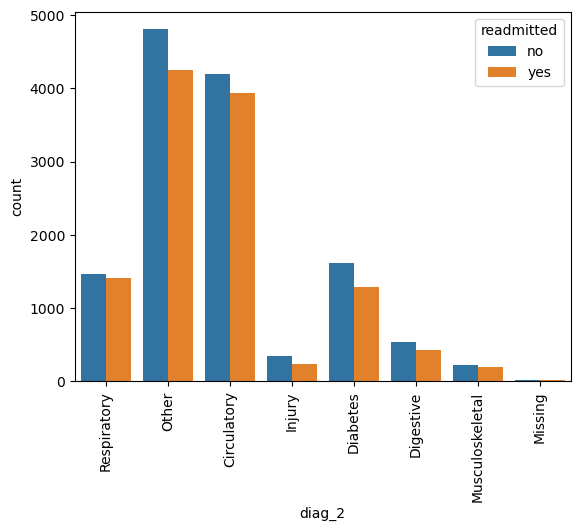

diag_3


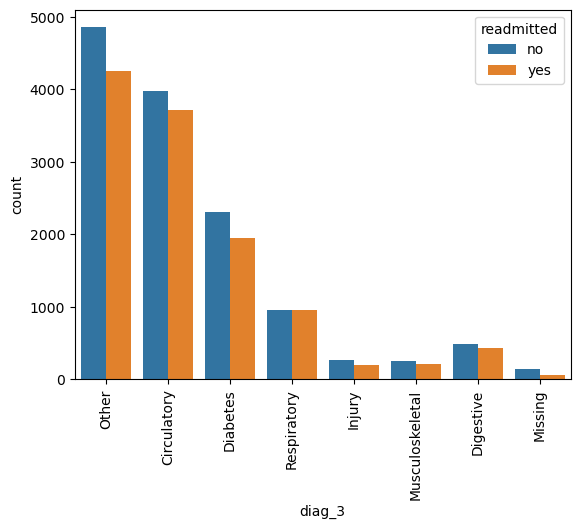

glucose_test


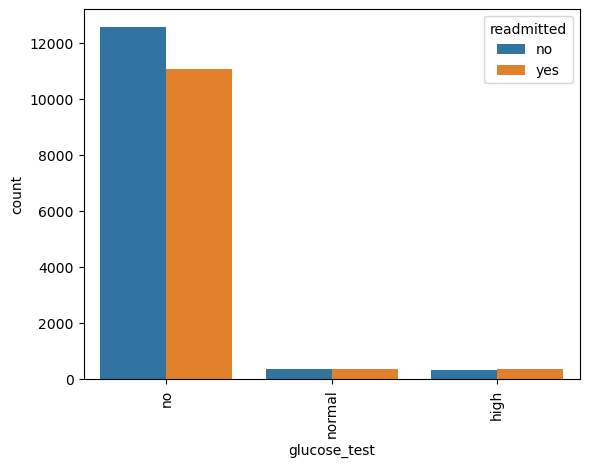

A1Ctest


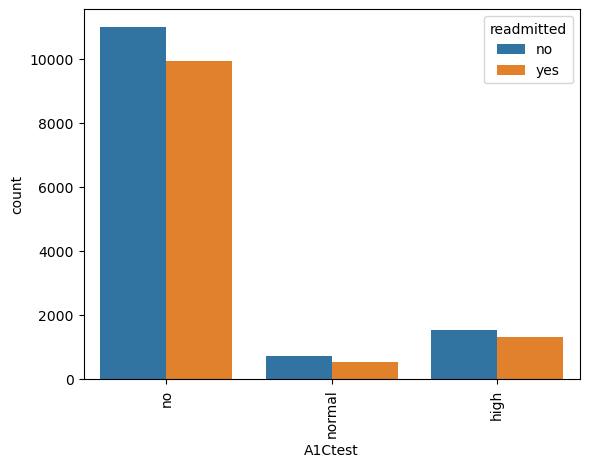

change


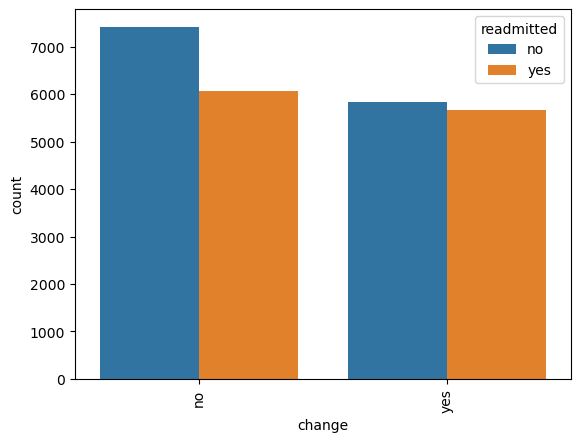

diabetes_med


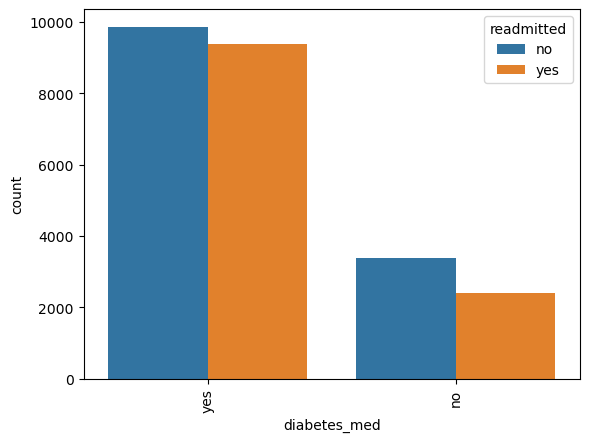

readmitted


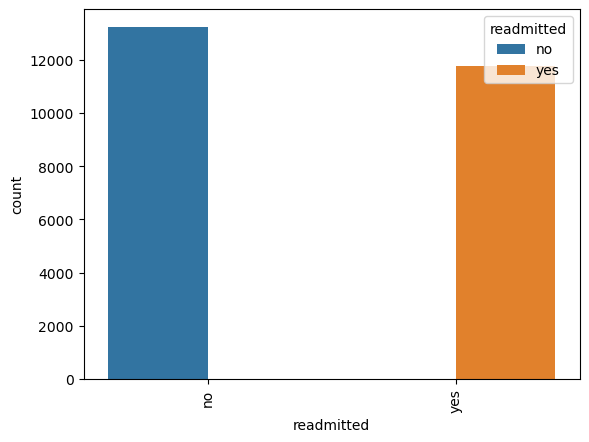

In [17]:
for i in df.select_dtypes(exclude=np.number).columns:
    print(i)
    sns.countplot(data=df,x=df[i],hue=df['readmitted'])
    plt.xticks(rotation=90)
    plt.show()

# Categorical vs Numerical Analysis

age


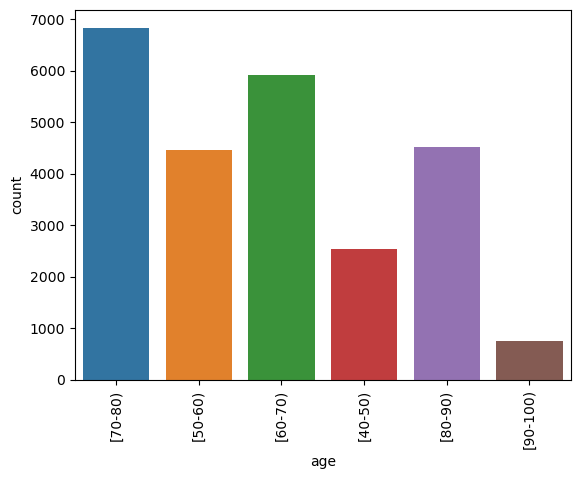

medical_specialty


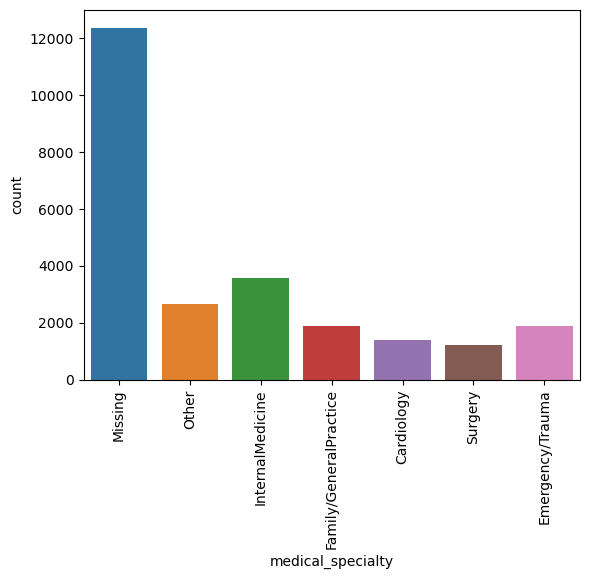

diag_1


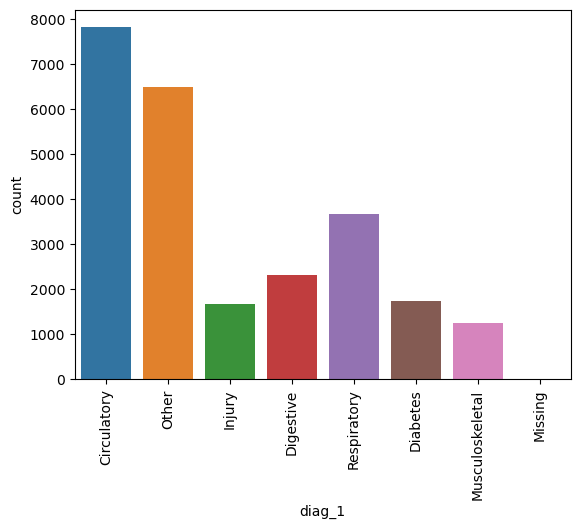

diag_2


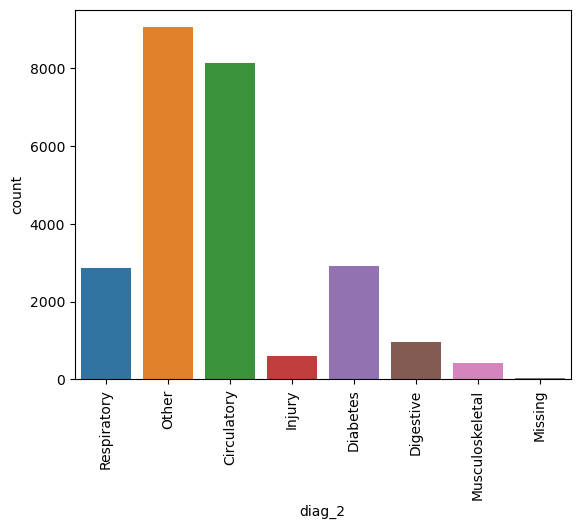

diag_3


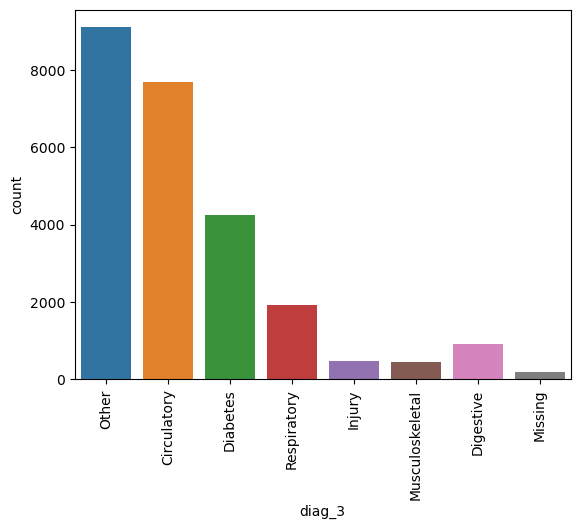

glucose_test


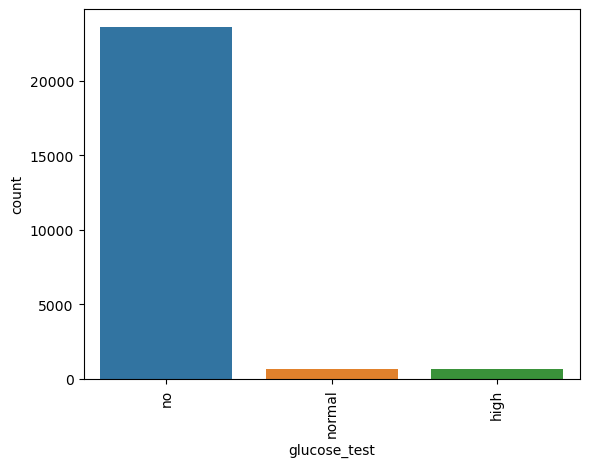

A1Ctest


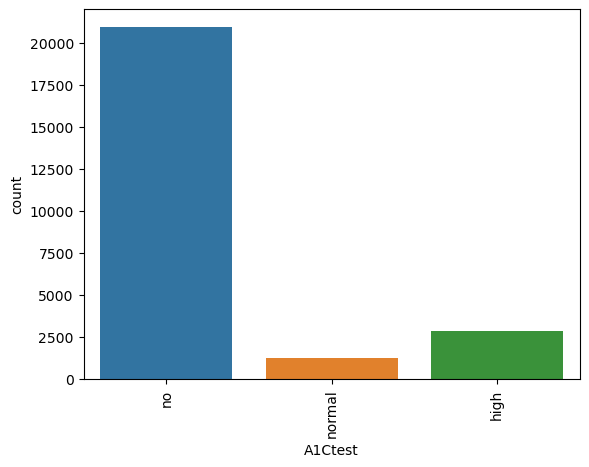

change


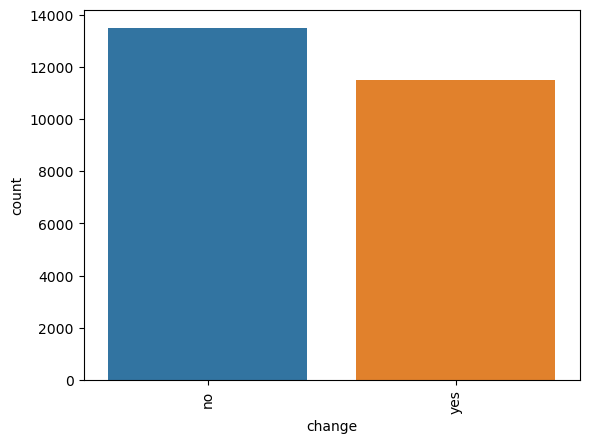

diabetes_med


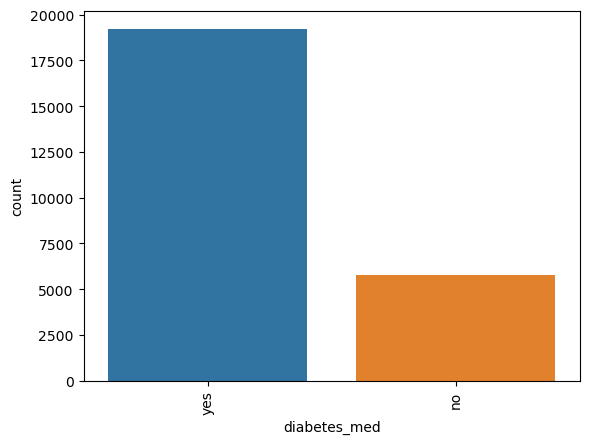

readmitted


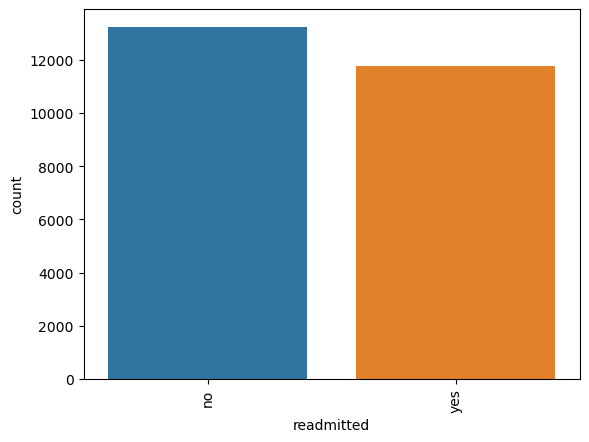

In [18]:
for i in df.select_dtypes(exclude=np.number).columns:
    print(i)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

**Next we are checking whether outlier is present in the dataset**

In [19]:
df.select_dtypes(include=np.number).columns

Index(['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency'],
      dtype='object')

time_in_hospital


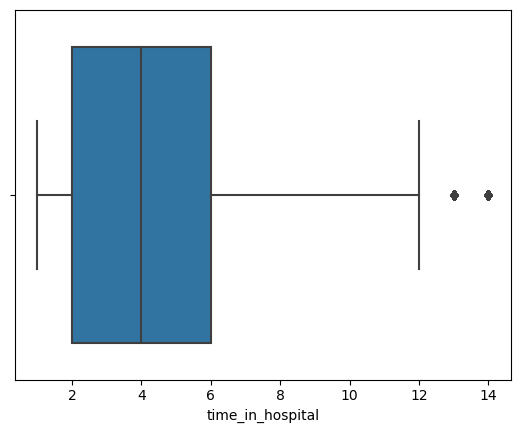

n_lab_procedures


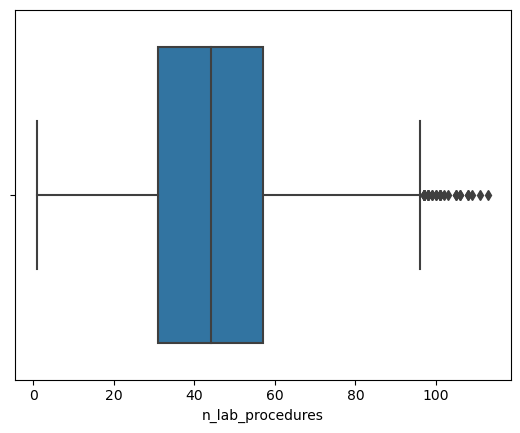

n_procedures


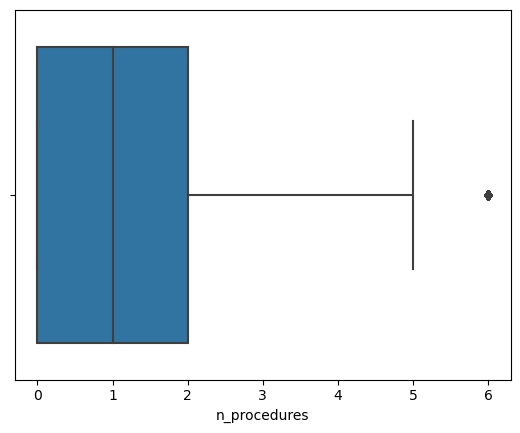

n_medications


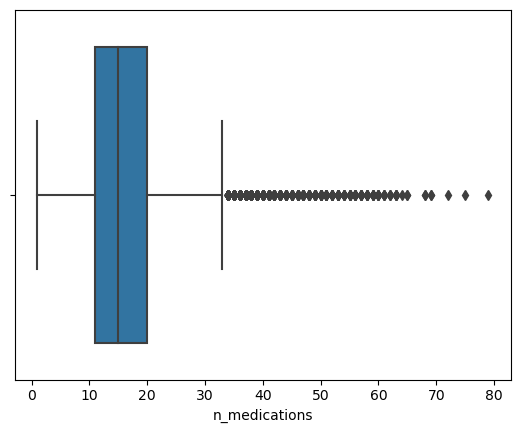

n_outpatient


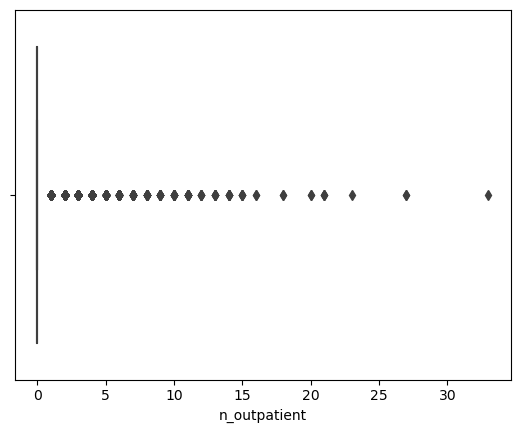

n_inpatient


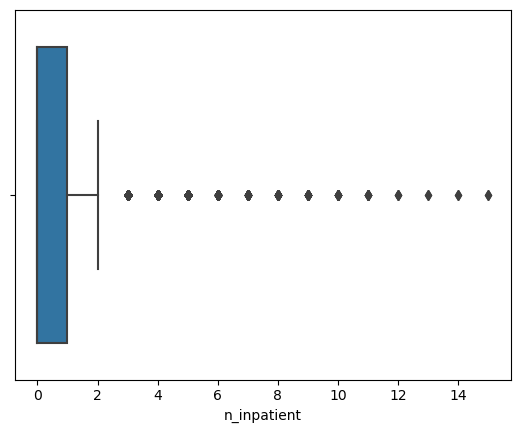

n_emergency


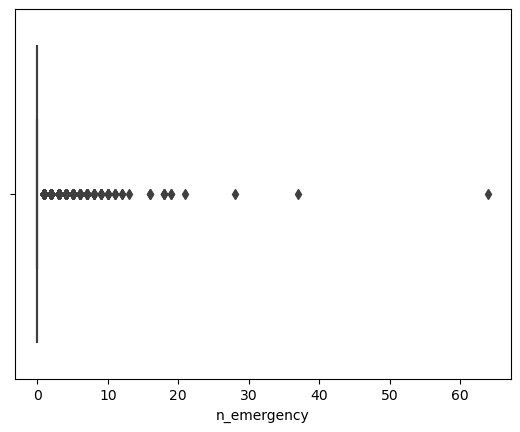

In [20]:
for i in df.select_dtypes(include=np.number).columns:
    print(i)
    sns.boxplot(df[i])
    plt.show()

With the above graph we can conclude that there is outliers present in the dataset.

As of now we are not treating the outlier because every medical information is valid.

In [21]:
#for i in df.select_dtypes(include=np.number).columns:
#    q1=df[i].quantile(0.25)
#    q3=df[i].quantile(0.75)
#    IQR=q3-q1
#    ll=q1-1.5*IQR
#    ul=q3+1.5*IQR
#    df[i]=df[i].apply(lambda x: ul if (x>ul) else ll if (x<ll) else x)

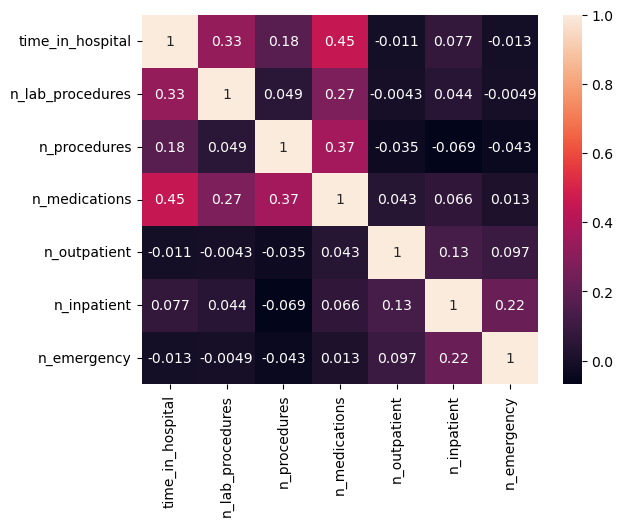

In [22]:
#Checking the multicollinearity 
sns.heatmap(df.corr(),annot=True)
plt.show()

From the above heatmap we can say that there is no multicollinearity between variables

# Encoding

Here we are label encoding for changing the categorical variables to numerical

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
df_cat=df.select_dtypes(exclude=np.number).drop(columns='readmitted')

In [25]:
df_cat.columns

Index(['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med'],
      dtype='object')

In [26]:
le=LabelEncoder()

In [27]:
for i in df_cat:
    df[i]=le.fit_transform(df[i])

In [28]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,3,8,72,1,18,2,0,0,4,0,7,6,1,1,0,1,no
1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,no
2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,yes
3,3,2,36,0,12,1,0,0,4,0,6,1,1,1,1,1,yes
4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,no


# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()

In [31]:
df_num=df.select_dtypes(include=np.number)
df_num.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med'],
      dtype='object')

In [32]:
df_new_num=sc.fit_transform(df_num)

In [33]:
df_nn=pd.DataFrame(df_new_num,columns=df_num.columns)

In [34]:
df_cap=pd.concat([df_nn,df['readmitted']],axis=1)

# Model Building

In [35]:
df_cap.head(2)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,0.498538,1.181671,1.451151,-0.205440,0.216814,1.366510,-0.522918,-0.210644,0.379678,-1.165984,1.258116,1.006767,-0.000512,0.159989,-0.923181,0.547893,no
1,0.498538,-0.484212,-0.466276,0.377601,-0.403505,-0.306494,-0.522918,-0.210644,1.081225,0.955864,0.914882,1.006767,-0.000512,0.159989,-0.923181,0.547893,no


In [36]:
X=df_cap.drop(columns='readmitted')
y=df_cap['readmitted']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (17500, 16)
X_test:  (7500, 16)
y_train:  (17500,)
y_test:  (7500,)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [41]:
lr=LogisticRegression()
lr_model=lr.fit(X_train,y_train)
lr_model

LogisticRegression()

In [42]:
from sklearn.metrics import classification_report

In [43]:
y_pred=lr.predict(X_test)

In [44]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.60      0.79      0.68      4000
         yes       0.62      0.40      0.49      3500

    accuracy                           0.61      7500
   macro avg       0.61      0.59      0.59      7500
weighted avg       0.61      0.61      0.59      7500



So the accuracy for our Logestic Regression Model is 61 %

# Theoretical of Logestic Regression

The logistic regression model predicts the probability that a certain event occurs. 

In [46]:
# Python implementation of logistic regression (sigmoid function)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [47]:
# Manually implementing logistic regression prediction
def manual_logistic_regression(X, coefficients, intercept):
    # Compute the linear part
    linear_part = np.dot(X, coefficients) + intercept
    # Apply the sigmoid function
    return sigmoid(linear_part)

In [49]:
# Extracting coefficients from trained model
coefficients = lr.coef_[0]
intercept = lr.intercept_[0]

In [53]:
coefficients

array([ 0.06636109,  0.05475724,  0.01559287, -0.08777829,  0.03153603,
        0.15415915,  0.45256431,  0.20225387, -0.03586717, -0.06779941,
       -0.03565672, -0.04271143,  0.00279838, -0.01032012,  0.01872976,
        0.1061248 ])

In [54]:
intercept

-0.09289080606437558

In [50]:
# Manually predicting probabilities for the test set
y_prob_manual = manual_logistic_regression(X_test, coefficients, intercept)
y_prob_manual

array([0.55584018, 0.34715089, 0.44232559, ..., 0.61743705, 0.37097415,
       0.58427488])

In [51]:
# Convert probabilities to binary predictions
y_pred_manual = [1 if prob >= 0.5 else 0 for prob in y_prob_manual]
y_pred_manual

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,


In [52]:
# Compare with sklearn's prediction
print(f'Sklearn Prediction: {y_pred[:5]}')
print(f'Manual Prediction: {y_pred_manual[:5]}')

Sklearn Prediction: ['yes' 'no' 'no' 'no' 'no']
Manual Prediction: [1, 0, 0, 0, 0]
